# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

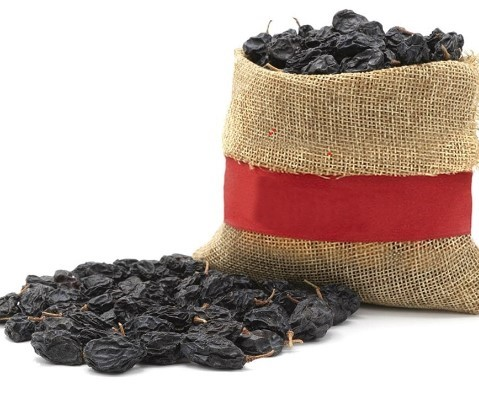

            Keçimen Raisin

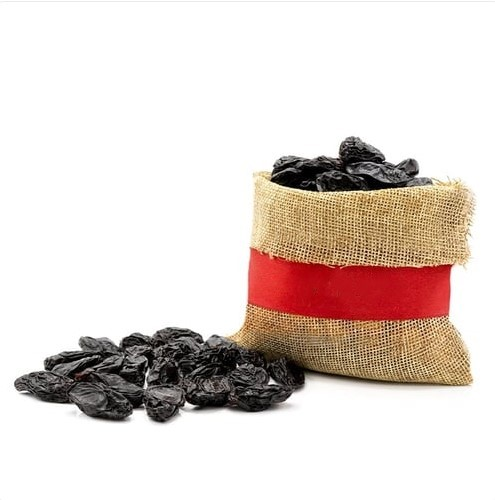

             Besni Raisin

***Besni Raisin:*** Its state before drying is called Prophet grape, and its state after drying is called Besni raisin. It took its name from Besni district of Adıyaman. After the besni grapes are collected, they are oiled with a mixture of potassium and olive oil and dried. It is sold as nuts after the grapes are dried.<br>
***Keçemen Raisin:*** is known as black raisin. Kekemen raisin with seeds is the most effective antioxidant known. It is a special grape type that grows only in the Karaman district and Hadim district of Konya in our country.

# Import libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.options.display.float_format = '{:.4f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
data = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df = data.copy()

In [4]:
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524         442.2460         253.2912        0.8197       90546  0.7587   
1  75166         406.6907         243.0324        0.8018       78789  0.6841   
2  90856         442.2670         266.3283        0.7984       93717  0.6376   
3  45928         286.5406         208.7600        0.6850       47336  0.6996   
4  79408         352.1908         290.8275        0.5640       81463  0.7928   

   Perimeter    Class  
0  1184.0400  Kecimen  
1  1121.7860  Kecimen  
2  1208.5750  Kecimen  
3   844.1620  Kecimen  
4  1073.2510  Kecimen

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [9]:
df.describe().T

count       mean        std        min        25%  \
Area            900.0000 87804.1278 39002.1114 25387.0000 59348.0000   
MajorAxisLength 900.0000   430.9300   116.0351   225.6295   345.4429   
MinorAxisLength 900.0000   254.4881    49.9889   143.7109   219.1111   
Eccentricity    900.0000     0.7815     0.0903     0.3487     0.7418   
ConvexArea      900.0000 91186.0900 40769.2901 26139.0000 61513.2500   
Extent          900.0000     0.6995     0.0535     0.3799     0.6709   
Perimeter       900.0000  1165.9066   273.7643   619.0740   966.4108   

                       50%         75%         max  
Area            78902.0000 105028.2500 235047.0000  
MajorAxisLength   407.8040    494.1870    997.2919  
MinorAxisLength   247.8484    279.8886    492.2753  
Eccentricity        0.7988      0.8426      0.9621  
ConvexArea      81651.0000 108375.7500 278217.0000  
Extent              0.7074      0.7350      0.8355  
Perimeter        1119.5090   1308.3898   2697.7530

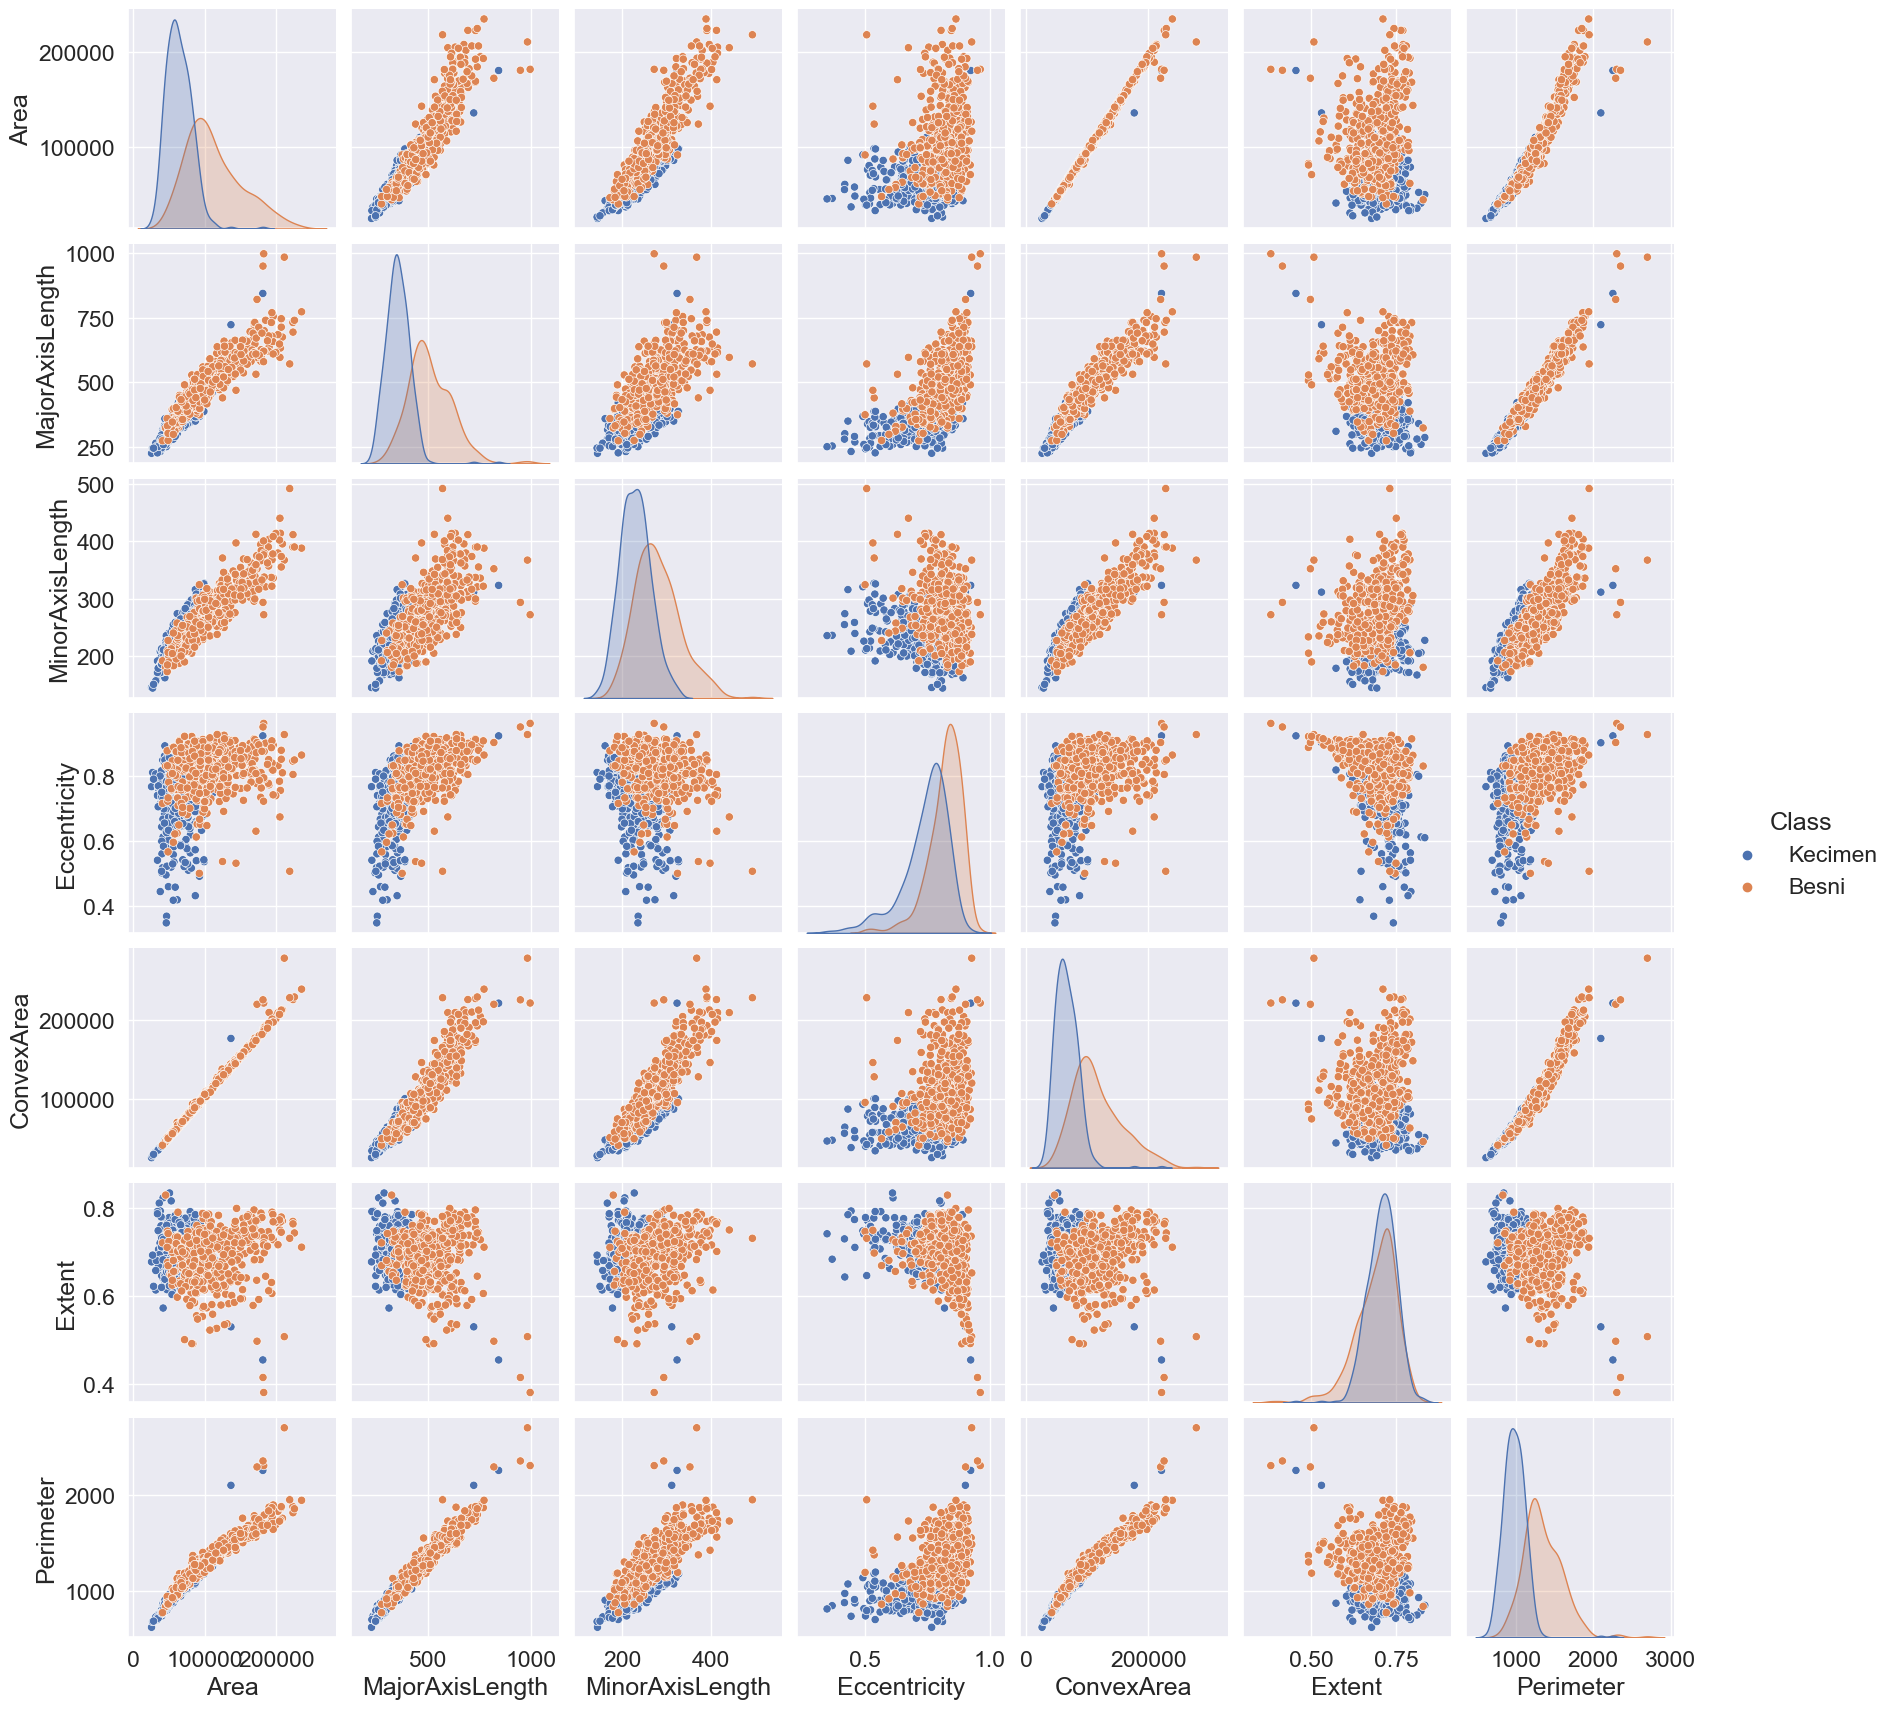

In [18]:
sns.set(font_scale =1.5)
sns.pairplot(data=df,hue="Class",);

- As shown in the pairplot graph above we can say that the ***most distinguishing*** feature is ***majoraxislength*** feature
- There is  a strongly linear correlation between area feature and convexarea feature 
- Extent feature has no correlation with any other features
- The ***majoraxislength*** the most disinguishing feature has strongest correlation with ***perimeter feature***
- Extent feature may not contribute model learning  
- For the kecimen class, the spread of values in most columns is narrower than for the other class so we can say this is a effective distinctive detail

In [9]:
fig = px.box(df,color = "Class")
fig.show ();


### Feature Engineering
#### Area

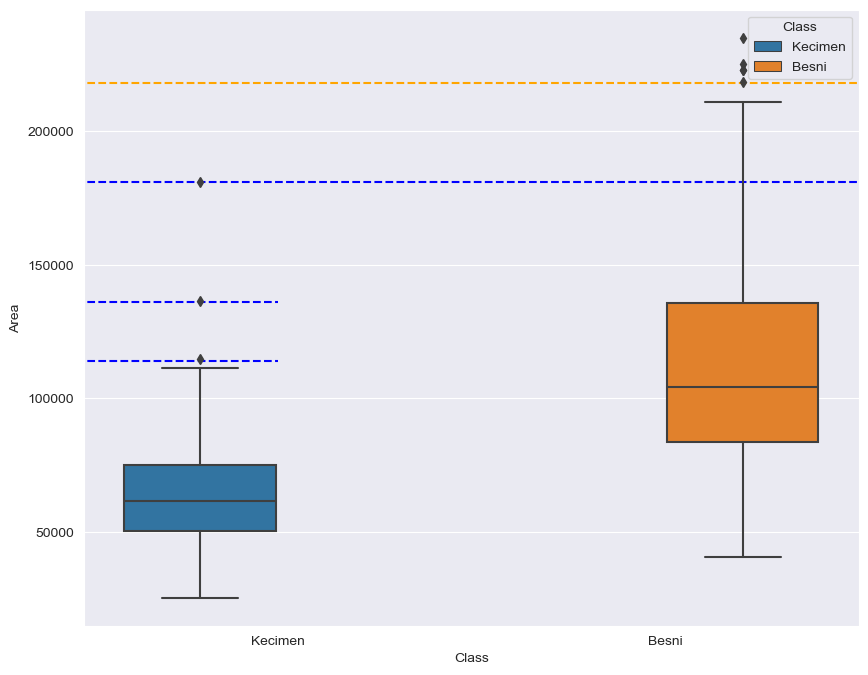

In [22]:
plt.figure(figsize=(10,8))

plt.hlines(y=181000, xmin = -10, xmax = 10, colors= 'b', linestyles="--")
plt.hlines(y=114000, xmin = -10, xmax = 0, colors= 'b', linestyles="--")
plt.hlines(y=136000, xmin = -10, xmax = 0, colors= 'b', linestyles="--")
plt.hlines(y=218000, xmin = -10, xmax = 10, colors= 'orange', linestyles="--")
sns.set_style("darkgrid")
sns.boxplot(data=df, x="Class",y="Area",hue="Class");



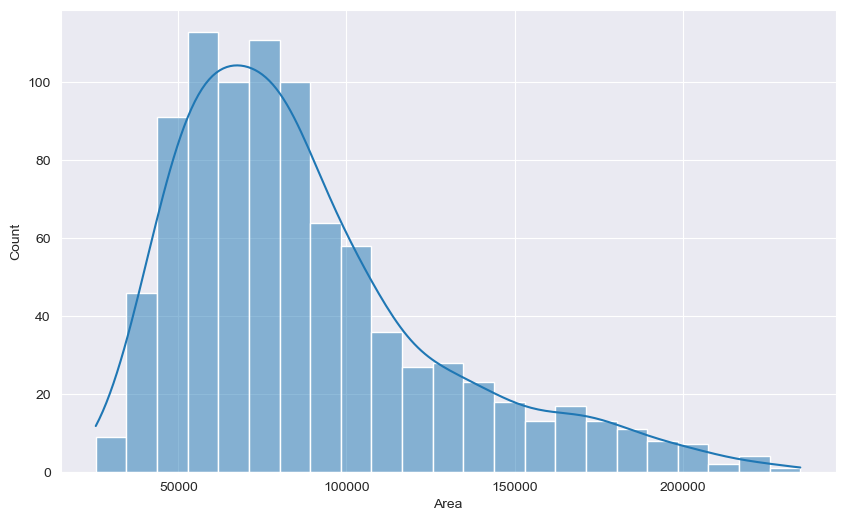

In [19]:
sns.histplot(data=df,x="Area",kde=True);

In [7]:
df[df["Class"]=="Kecimen"]["Area"].describe()

count      450.0000
mean     63413.4667
std      17727.7688
min      25387.0000
25%      50466.2500
50%      61420.0000
75%      75153.0000
max     180898.0000
Name: Area, dtype: float64

In [8]:
75153.0000+1.5*(75153.0000-50466.2500)

112183.125

In [14]:
25387.0000-1.5*(75153.0000-50466.2500)


-11643.125

In [13]:
df[df["Class"]=="Besni"]["Area"].describe()

count      450.0000
mean    112194.7889
std      39229.8979
min      40702.0000
25%      83598.5000
50%     104426.5000
75%     135683.2500
max     235047.0000
Name: Area, dtype: float64

In [12]:
kec_outliers_rows= df[(df["Class"]=="Kecimen")&(df["Area"]>112183.125)].index
kec_outliers_rows

Int64Index([51, 85, 290], dtype='int64')

In [15]:
135683.2500+1.5*(135683.2500-83598.5000)

213810.375

In [16]:
bes_outliers_rows= df[(df["Class"]=="Besni")&(df["Area"]>213810.375)].index
bes_outliers_rows

Int64Index([708, 804, 812, 866, 880], dtype='int64')

#### MajorAxisLength

In [16]:
df[df["Class"]=="Kecimen"]["MajorAxisLength"].describe()

count   450.0000
mean    352.8592
std      59.6115
min     225.6295
25%     313.5358
50%     350.2341
75%     390.3616
max     843.9567
Name: MajorAxisLength, dtype: float64

In [17]:
df[df["Class"]=="Besni"]["MajorAxisLength"].describe()

count   450.0000
mean    509.0007
std     105.7712
min     274.1690
25%     436.5460
50%     493.1859
75%     582.3866
max     997.2919
Name: MajorAxisLength, dtype: float64

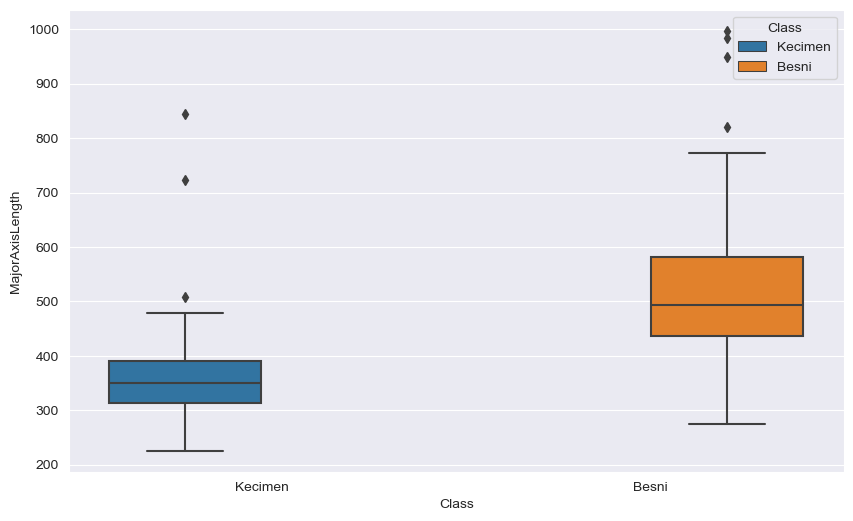

In [11]:
sns.set_style("darkgrid")
sns.boxplot(data=df, x="Class",y="MajorAxisLength",hue="Class",showfliers=True);

- For Kecimen class MajorAxisLength feature has ***3 outliers*** while for Besni class has ***4***   
- As mentioned before, we can see from the boxplot that the Keçimen class is spread over a narrower area than the Besni class, % 50 of values of the MajorAxisLength feature spread between 390.3616 and 313.5358 while for Besni class this range is between 582.3866 and 436.5460
- Another point that draws our attention is that the values distribution is normal for the Kecimen class, but this situation is slightly different for other class ,there is sligthly right skewness

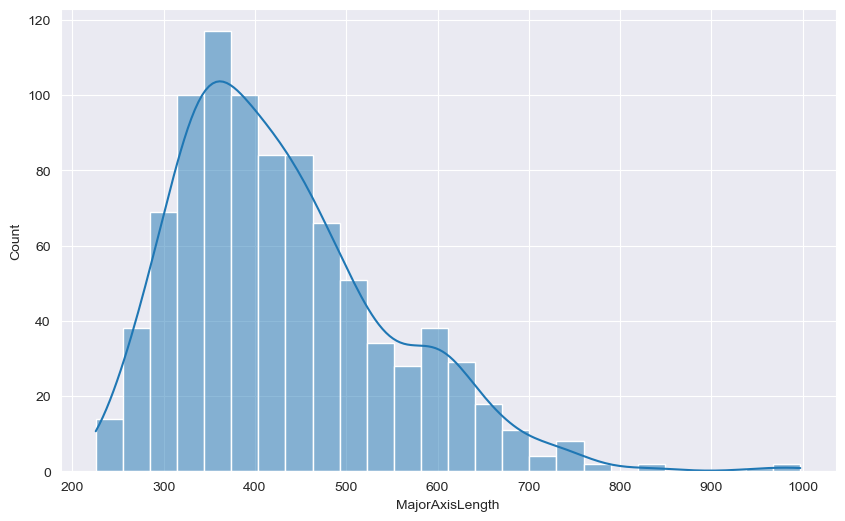

In [20]:
sns.histplot(data=df,x="MajorAxisLength",kde=True);

#### MinorAxisLength

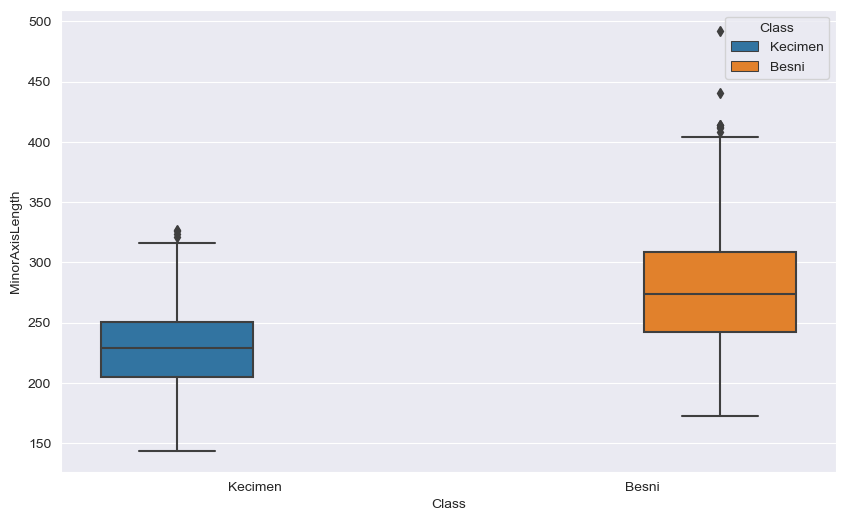

In [22]:
sns.boxplot(data=df, x="Class",y="MinorAxisLength",hue="Class",showfliers=True);

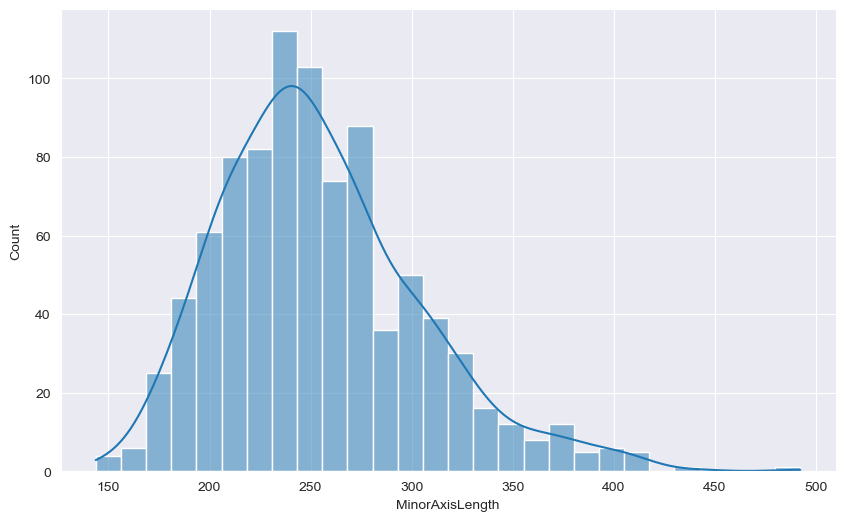

In [24]:
sns.histplot(data=df,x="MinorAxisLength",kde=True);

#### Eccentricity

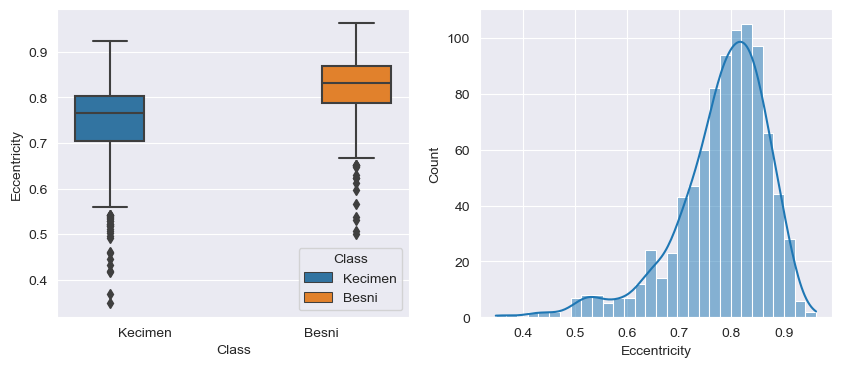

In [42]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

sns.boxplot(data=df, x="Class",y="Eccentricity",hue="Class",showfliers=True,ax=ax[0])
sns.histplot(data=df,x="Eccentricity",kde=True,ax=ax[1])

plt.show()

In [92]:
stats.skew(df["Eccentricity"])

-1.3252897159085628

#### ConvexArea

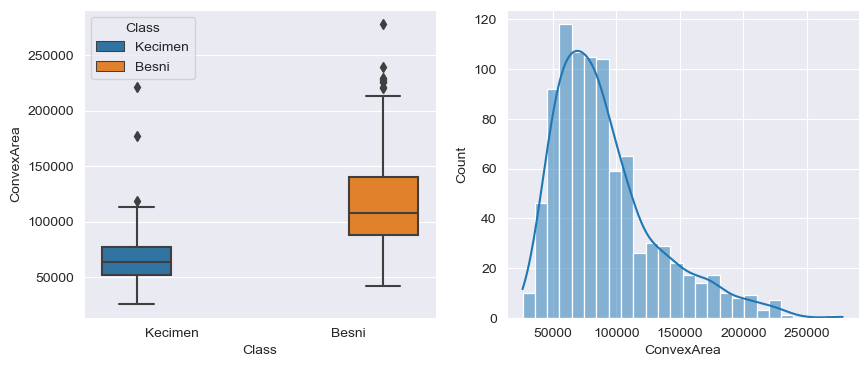

In [39]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

sns.boxplot(data=df, x="Class",y="ConvexArea",hue="Class",showfliers=True,ax=ax[0])
sns.histplot(data=df,x="ConvexArea",kde=True,ax=ax[1])

plt.show()

In [89]:
from scipy.stats import stats

In [90]:
stats.skew(df["ConvexArea"])

1.2408315755758617

In [19]:
df[df["Class"]=="Besni"]["ConvexArea"].describe()

count      450.0000
mean    116675.8244
std      40797.0678
min      41924.0000
25%      87668.0000
50%     108062.5000
75%     139779.7500
max     278217.0000
Name: ConvexArea, dtype: float64

In [20]:
139779.7500 + 1.5 * (139779.7500-87668.0000)

217947.375

In [22]:
df[df["Class"]=="Kecimen"]["ConvexArea"].describe()

count      450.0000
mean     65696.3556
std      19005.8918
min      26139.0000
25%      52115.0000
50%      63826.5000
75%      77504.2500
max     221396.0000
Name: ConvexArea, dtype: float64

In [23]:
77504.2500 + 1.5 *(77504.2500 - 52115.0000 )

115588.125

In [25]:
coarea_outliers_rows= df[(df["Class"]=="Besni")&(df["ConvexArea"]>217947.375)].index
coarea_outliers_rows

Int64Index([487, 506, 694, 708, 804, 812, 836, 866, 880], dtype='int64')

In [26]:
kcoarea_outliers_rows= df[(df["Class"]=="Kecimen")&(df["ConvexArea"]>115588.125)].index
kcoarea_outliers_rows

Int64Index([51, 85, 290], dtype='int64')

In [28]:
df2 = df.drop([487, 506, 694, 708, 804, 812, 836, 866, 880,51, 85, 290])
df2.shape

(888, 8)

#### Extent

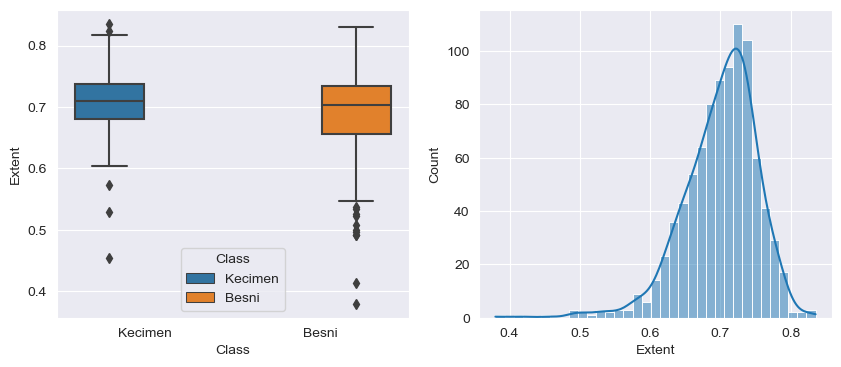

In [44]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

sns.boxplot(data=df, x="Class",y="Extent",hue="Class",showfliers=True,ax=ax[0])
sns.histplot(data=df,x="Extent",kde=True,ax=ax[1])

plt.show()

In [91]:
stats.skew(df["Extent"])

-1.1495846874562732

#### Perimeter

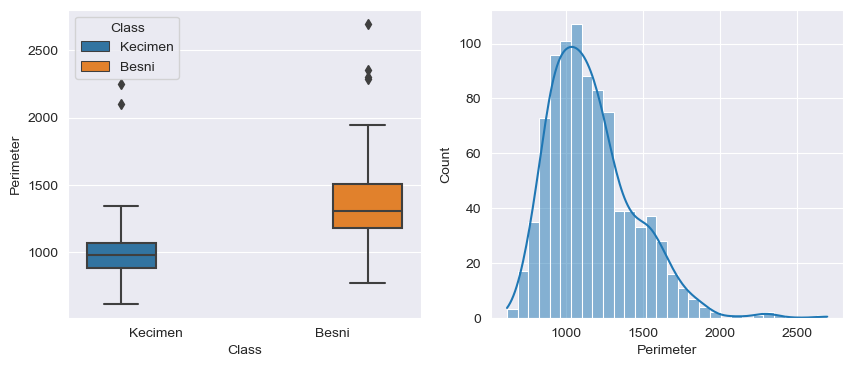

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

sns.boxplot(data=df, x="Class",y="Perimeter",hue="Class",showfliers=True,ax=ax[0])
sns.histplot(data=df,x="Perimeter",kde=True,ax=ax[1])

plt.show()

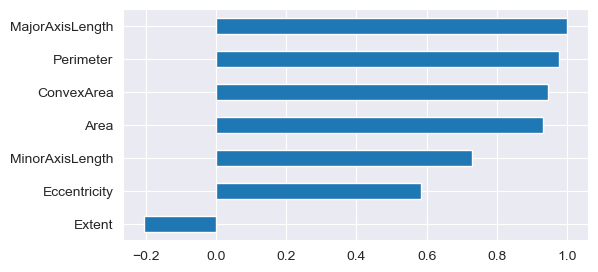

In [57]:
plt.figure(figsize=(6,3))
df.corr()["MajorAxisLength"].sort_values().plot.barh();

In [66]:
df.corr()[df.corr()["MajorAxisLength"]>0.9]["MajorAxisLength"].index.tolist()

['Area', 'MajorAxisLength', 'ConvexArea', 'Perimeter']

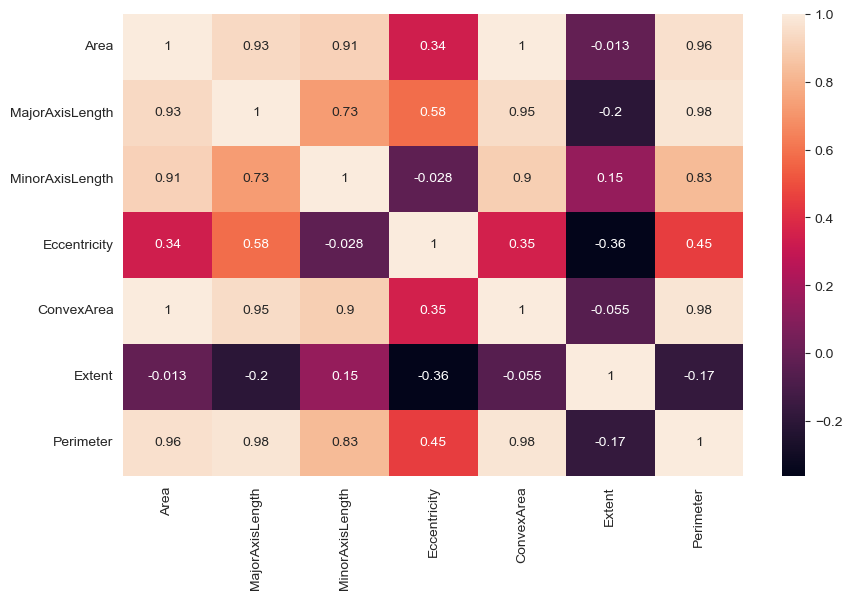

In [67]:
sns.heatmap(df.corr(),annot=True);

In [5]:
def color_red(val):
    if val > 0.89 and val < 0.9999:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'white'
    return f'background-color: {color}'


df.corr().style.applymap(color_red)

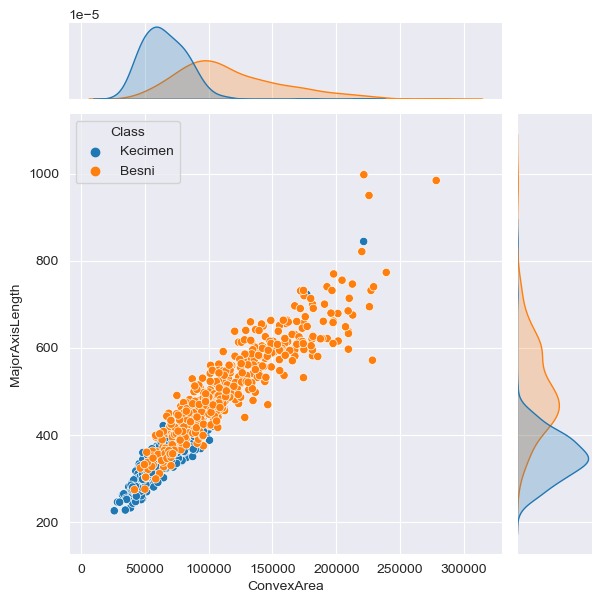

In [68]:
sns.jointplot(data=df, x="ConvexArea", y="MajorAxisLength", hue="Class");

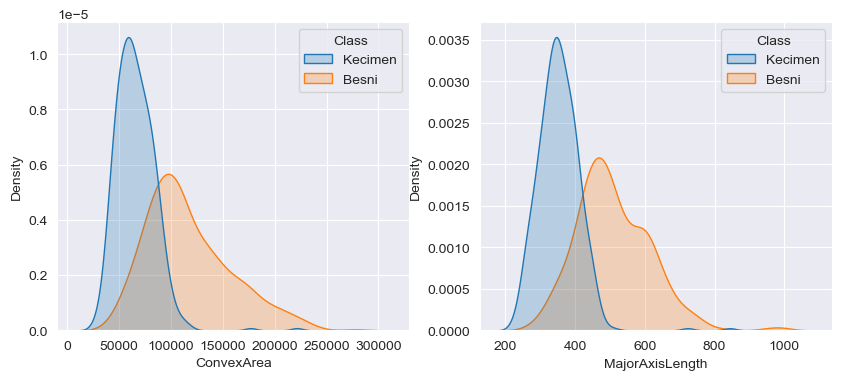

In [71]:
fig,ax =plt.subplots(1,2,figsize=(10, 4))
sns.kdeplot(data=df,x = "ConvexArea", shade =True ,hue="Class",ax=ax[0])
sns.kdeplot(data=df,x = "MajorAxisLength", shade =True ,hue="Class",ax=ax[1])

plt.show ();

- ***According to results of data analysis so far I want to drop 4 features have high correlation each other to avoid multicollinearity and I think that the convexarea feature represent all these features so we can use this feature instead of these 4 features I dropped***

In [29]:
df_new = df2.drop(["MajorAxisLength","Area","Perimeter","MinorAxisLength"],axis=1)
df_new.head()

Eccentricity  ConvexArea  Extent    Class
0        0.8197       90546  0.7587  Kecimen
1        0.8018       78789  0.6841  Kecimen
2        0.7984       93717  0.6376  Kecimen
3        0.6850       47336  0.6996  Kecimen
4        0.5640       81463  0.7928  Kecimen

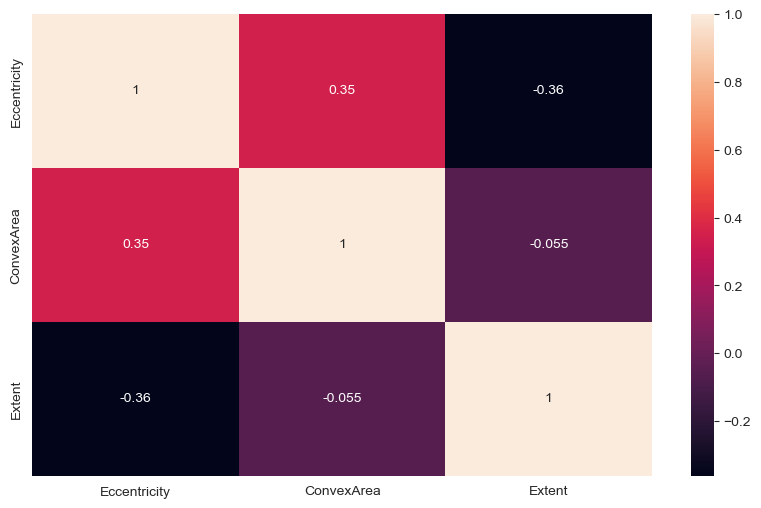

In [77]:
sns.heatmap(df_new.corr(),annot=True);

## Train | Test Split and Scaling

In [30]:
X = df_new.drop(["Class"], axis = 1)
y = df_new["Class"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 42)

In [61]:
X_test.shape

(178, 3)

In [63]:
y_train.shape

(710,)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()

In [38]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [45]:
log_model.classes_

array(['Besni', 'Kecimen'], dtype=object)

In [40]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

Eccentricity  ConvexArea  Extent    Class     pred  pred_proba
808        0.8327       98337  0.7130    Besni    Besni      0.1704
594        0.8559      139806  0.6796    Besni    Besni      0.0052
699        0.8822      128308  0.6818    Besni    Besni      0.0098
512        0.7422      105429  0.7133    Besni    Besni      0.2307
484        0.7255      159063  0.7391    Besni    Besni      0.0064
215        0.6461       64021  0.7161  Kecimen  Kecimen      0.9535
362        0.7786       67524  0.6558  Kecimen  Kecimen      0.7334
459        0.8882       93706  0.4910    Besni    Besni      0.0399
335        0.7998       55143  0.8174  Kecimen  Kecimen      0.9409
252        0.7864       39765  0.7604  Kecimen  Kecimen      0.9769

## Model Performance

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[72 13]
 [11 82]]
              precision    recall  f1-score   support

       Besni       0.87      0.85      0.86        85
     Kecimen       0.86      0.88      0.87        93

    accuracy                           0.87       178
   macro avg       0.87      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178


Train_Set
[[303  53]
 [ 42 312]]
              precision    recall  f1-score   support

       Besni       0.88      0.85      0.86       356
     Kecimen       0.85      0.88      0.87       354

    accuracy                           0.87       710
   macro avg       0.87      0.87      0.87       710
weighted avg       0.87      0.87      0.87       710



- ***Since our dataset is balanced, i.e. each class has the same number of observations and both of classes's socres are important for us we will evaluate the accuracy metric*** As shown results above both of train and test values of accuracy has trade off so our model run correctly and accordance with the dataset

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

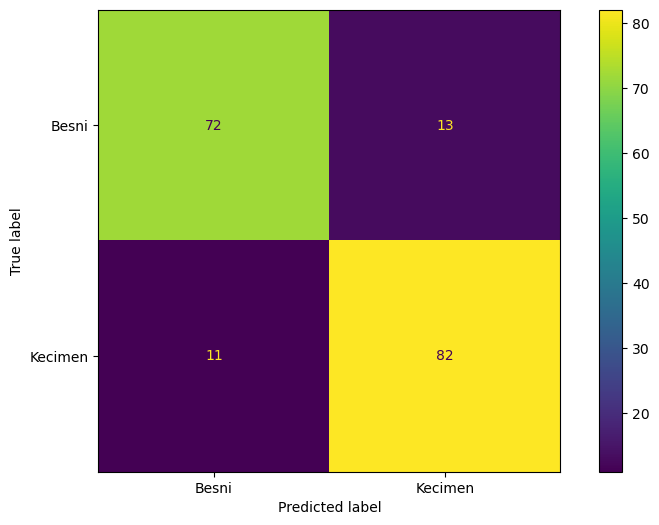

In [60]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

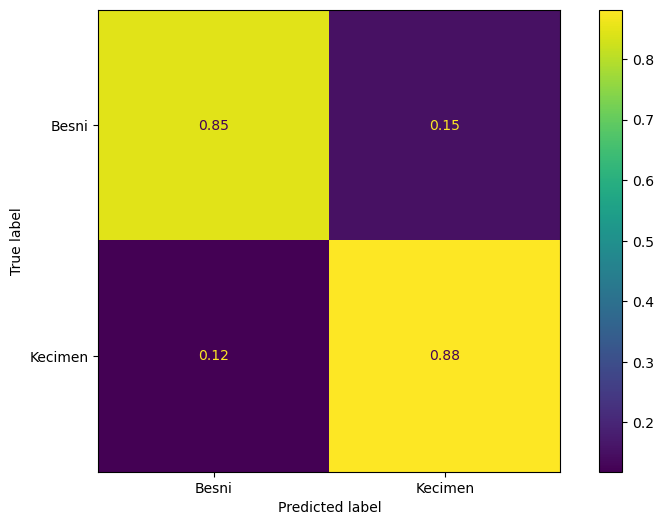

In [48]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test,normalize="true");

### Cross Validate

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [39]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))

In [40]:
df_scores

fit_time  score_time  test_precision  test_recall  test_f1  test_accuracy
1     0.0138      0.0352             NaN          NaN      NaN         0.8194
2     0.0102      0.0213             NaN          NaN      NaN         0.8750
3     0.0100      0.0130             NaN          NaN      NaN         0.8194
4     0.0000      0.0156             NaN          NaN      NaN         0.9444
5     0.0156      0.0200             NaN          NaN      NaN         0.8472
6     0.0100      0.0122             NaN          NaN      NaN         0.8889
7     0.0102      0.0120             NaN          NaN      NaN         0.7917
8     0.0000      0.0156             NaN          NaN      NaN         0.8056
9     0.0156      0.0156             NaN          NaN      NaN         0.8889
10    0.0156      0.0000             NaN          NaN      NaN         0.9028

### GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

In [66]:
model = LogisticRegression()

penalty = ["l2", "l1"]
C = np.logspace(-1, 5, 30) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "accuracy") 
                          

In [67]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-01, 1.61026203e-01, 2.59294380e-01, 4.17531894e-01,
       6.72335754e-01, 1.08263673e+00, 1.74332882e+00, 2.80721620e+00,
       4.52035366e+00, 7.27895384e+00, 1.17210230e+01, 1.88739182e+01,
       3.03919538e+01, 4.89390092e+01, 7.88046282e+01, 1.26896100e+02,
       2.04335972e+02, 3.29034456e+02, 5.29831691e+02, 8.53167852e+02,
       1.37382380e+03, 2.21221629e+03, 3.56224789e+03, 5.73615251e+03,
       9.23670857e+03, 1.48735211e+04, 2.39502662e+04, 3.85662042e+04,
       6.21016942e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [68]:
y_pred = grid_model.predict(X_test_scaled)
y_pred_proba = grid_model.predict_proba(X_test_scaled)

In [69]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [70]:
grid_model.best_score_

0.8676056338028169

In [71]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[70 15]
 [ 7 86]]
              precision    recall  f1-score   support

       Besni       0.91      0.82      0.86        85
     Kecimen       0.85      0.92      0.89        93

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.88       178
weighted avg       0.88      0.88      0.88       178


Train_Set
[[295  61]
 [ 35 319]]
              precision    recall  f1-score   support

       Besni       0.89      0.83      0.86       356
     Kecimen       0.84      0.90      0.87       354

    accuracy                           0.86       710
   macro avg       0.87      0.86      0.86       710
weighted avg       0.87      0.86      0.86       710



In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred)

0.8651685393258427

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [57]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

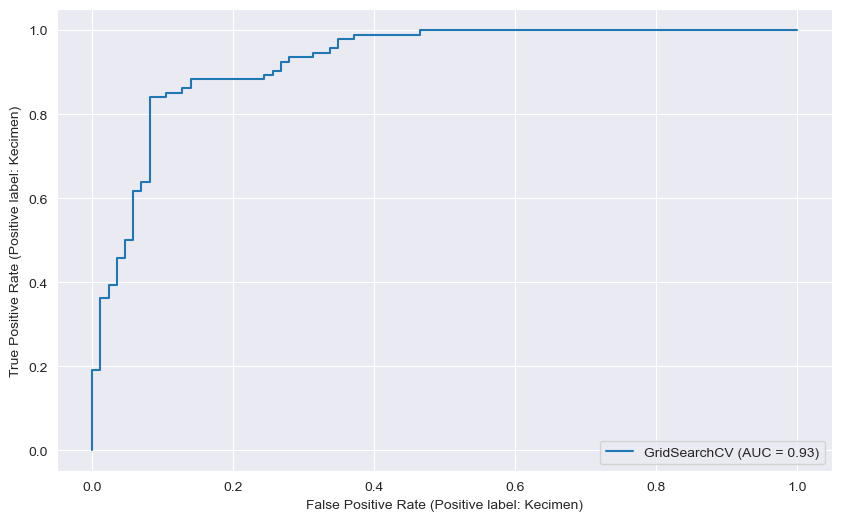

In [59]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test);

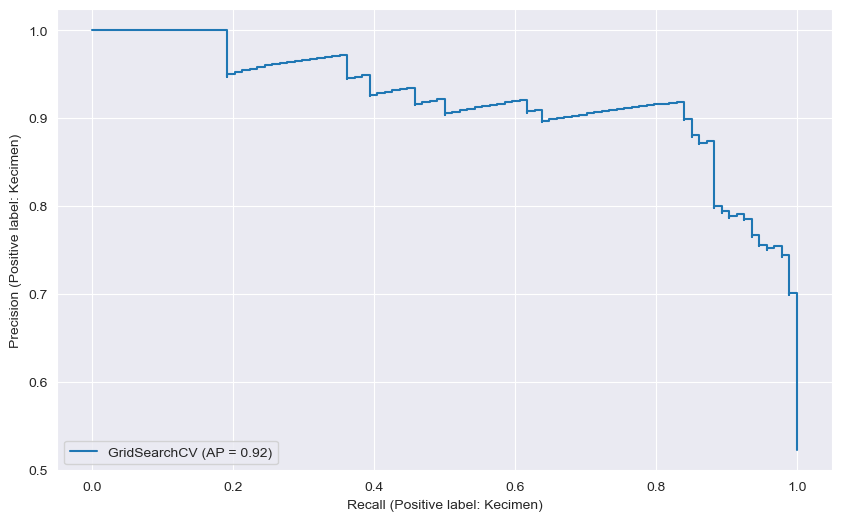

In [60]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test);

## Final Model and Deployment

In [61]:
scaler = StandardScaler().fit(X)

In [65]:
import pickle
pickle.dump(scaler, open("scaler_raisin_dataset", "wb"))

In [66]:
X_scaled = scaler.transform(X)

In [67]:
final_model = LogisticRegression(C=0.1, 
                                 class_weight="balanced", 
                                 penalty= "l2", 
                                 solver = "liblinear").fit(X_scaled, y)

In [68]:
pickle.dump(final_model, open("raisin_classification", "wb"))

# Conclusion 

When we examined our problem, we saw that this is a classification problem, our target feture is categorical and consists of 2 classes with equal observations and we decided to use the logistic regression algorithm, as we have seen as a result of EDA studies and feature engineering studies in our dataset given to us, and by checking more scores, we have seen that you can make optimum class predictions without reducing model performance by using only 3 of the 7 morphological features, we have created our model in line with this information and received our outputs.***Due to the characteristics of our dataset, we made our performance evaluation according to the accuracy metric and found the best model parameters accordingly, and as a result, we obtained an accuracy score of 0.87, which means that our model predicts 87% of the predictions (total predictions made for both classes) correctly.***